In [1]:
# Import required libraries and dependencies
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import hvplot.pandas

# Machine Learning
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Open source baseball data
from pybaseball import statcast_pitcher
from pybaseball import playerid_lookup

# suppress warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [3]:
df_market_data.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [4]:

df_market_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


In [5]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [6]:
# Find if there are null values

In [7]:
df_market_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


In [8]:
# no null values so it looks good
# all the datatypes are numeric so encoding is not necessary

In [9]:
#features = ['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 'price_change_percentage_30d', 
            #'price_change_percentage_60d', 'price_change_percentage_200d', 'price_change_percentage_1y']
#df = df_market_data.loc[:, features]


#df.info()

In [10]:
# 1.Create a DataFrame with the scaled data
# 2. Copy the crypto names from the original data
# 3. Set the coinid column as index
# 4. Display sample data
# 5. initialize

scaler = StandardScaler()

# fit
scaler.fit(df_market_data)

# predict/transform
scaled_data = scaler.transform(df_market_data)
scaled_df = pd.DataFrame(scaled_data, columns=df_market_data.columns)
scaled_df.index = df_market_data.index

#got help from office hours for putting in index

scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

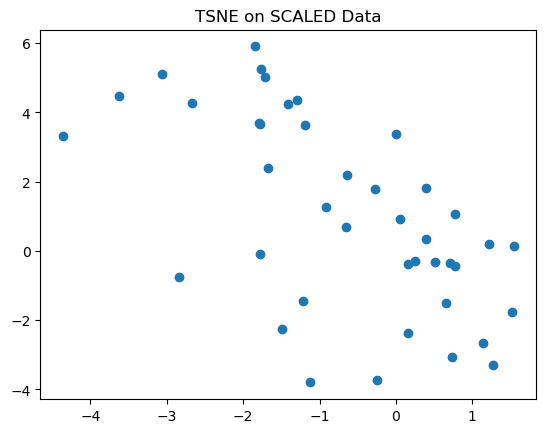

In [11]:
# Add labels
# took this from baseball example
# Can this even be clustered?
tsne2 = TSNE(perplexity=15)
df_tsne2 = pd.DataFrame(tsne2.fit_transform(scaled_df)) # fit SCALED data first

# Plot the clusters
plt.scatter(df_tsne2[0], df_tsne2[1])
plt.title("TSNE on SCALED Data")
plt.show()

In [12]:
# unsupervised clustering

In [13]:
# Create an empty list to store the inertia values
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list


In [14]:
X = scaled_df

In [15]:
 # Create a a list to store inertia values
inertia = []

# Create a a list to store the values of k
k = list(range(2, 11))

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the spread_df DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    # initialize the model
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # fit the model
    k_model.fit(X)
    
    # predict the model
    preds = k_model.predict(X)
    
    # evaluate the model (generate the metics)
    inertia.append(k_model.inertia_)

    
    print(f"Finished {i} out of {max(k)}")

Finished 2 out of 10
Finished 3 out of 10
Finished 4 out of 10
Finished 5 out of 10
Finished 6 out of 10
Finished 7 out of 10
Finished 8 out of 10
Finished 9 out of 10
Finished 10 out of 10


In [16]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

df_elbow["acc"] = df_elbow.inertia.diff()

# Create a DataFrame with the data to plot the Elbow curve
df_elbow.head(11)

,k,inertia,acc
0,2,195.820218,NaN
1,3,123.190482,-72.629736
2,4,79.022435,-44.168046
3,5,65.405923,-13.616512
4,6,52.933559,-12.472365
5,7,47.983124,-4.950435
6,8,37.288187,-10.694937
7,9,33.061685,-4.226502
8,10,28.779752,-4.281932


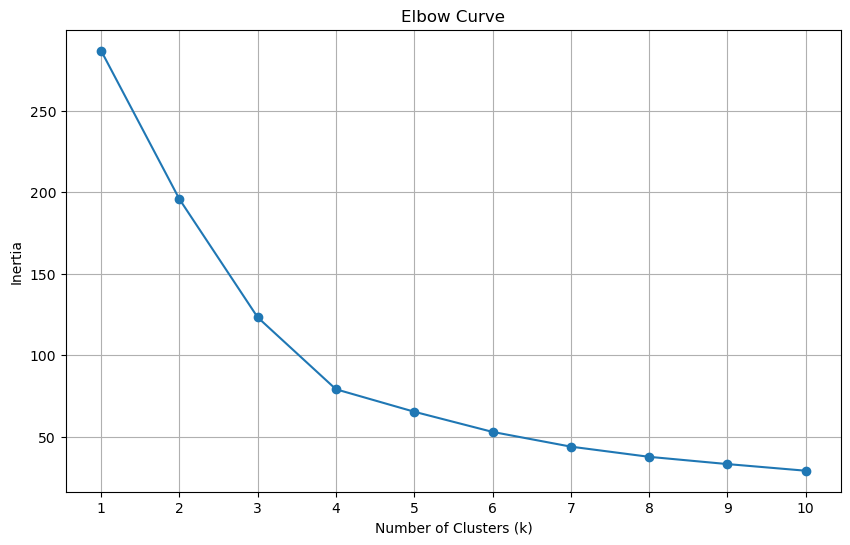

    k     inertia  inertia_diff        acc
0   1  287.000000           NaN        NaN
1   2  195.820218    -91.179782        NaN
2   3  123.190482    -72.629736  18.550045
3   4   79.022435    -44.168046  28.461690
4   5   65.220364    -13.802071  30.365975
5   6   52.829819    -12.390546   1.411526
6   7   43.786435     -9.043384   3.347162
7   8   37.527740     -6.258695   2.784688
8   9   33.070926     -4.456814   1.801881
9  10   28.989073     -4.081852   0.374962


In [17]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# plt.plot(df_elbow["k"], df_elbow["inertia"])
# plt.title("Elbow Curve")
# plt.xticks(df_elbow["k"])
# plt.ylabel("inertia")
# plt.xlabel("k")
# plt.show()
# Import required libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming you have already loaded and preprocessed your data into a DataFrame called 'df'
# and selected the features you want to use for clustering into 'X'

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate inertia for different k values
k_range = range(1, 11)  # You can adjust this range as needed
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": list(k_range), "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Calculate the acceleration of inertia change
df_elbow["inertia_diff"] = df_elbow.inertia.diff()
df_elbow["acc"] = df_elbow.inertia_diff.diff()

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(df_elbow["k"], df_elbow["inertia"], marker='o')
plt.title("Elbow Curve")
plt.xticks(df_elbow["k"])
plt.ylabel("Inertia")
plt.xlabel("Number of Clusters (k)")
plt.grid(True)
plt.show()

# Print the elbow data
print(df_elbow)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4 since the elbow graph shows a pocket at 4 and the dataframe used to plot the chart
shows K as being at 79 which is the closest to 1

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [18]:
new_df = df_market_data.copy()


# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

# Fit the model
model.fit(X)

# Make predictions
preds = model.predict(X)

# Add a class column with the labels to the df DataFrame
df_sub = new_df.copy()
df_sub['clusters'] = preds

df_sub.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,3
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,3
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,1
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,1
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,3


In [19]:
# Fit the K-Means model using the scaled data
new_df2 = scaled_df.copy()


# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=5, random_state=1)

# Fit the model
model.fit(X)

# Make predictions
preds = model.predict(X)

# Add a class column with the labels to the df DataFrame
df_sub2 = new_df2.copy()
df_sub2['clusters'] = preds

df_sub2.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,4
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,4
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


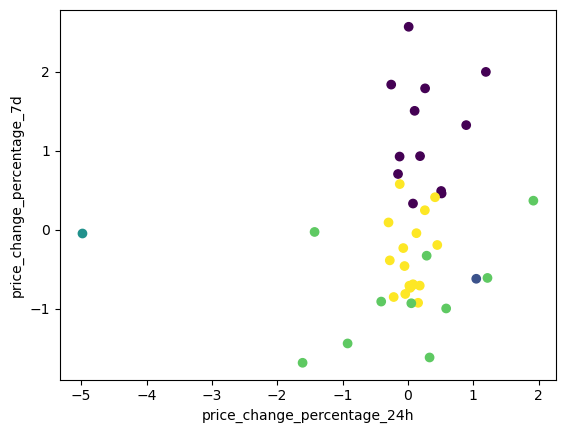

In [20]:
# Predict the clusters to group the cryptocurrencies using the scaled data
plt.scatter(df_sub2.price_change_percentage_24h, df_sub2.price_change_percentage_7d, c=df_sub2.clusters)
plt.ylabel("price_change_percentage_7d")
plt.xlabel("price_change_percentage_24h")
plt.show()

# Print the resulting array of cluster values.


In [21]:
# Figure out how to put these values into a df

In [22]:
# Create a copy of the DataFrame
# Add a new column to the DataFrame with the predicted clusters
df_sub2 = df_sub.copy()
df_sub2['clusters'] = preds

df_sub2.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,0
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,0
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,4
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,4
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,0


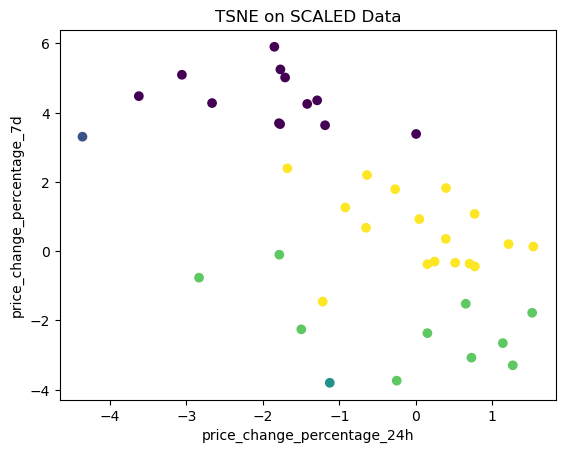

In [23]:
# Display sample data
plt.scatter(df_tsne2[0], df_tsne2[1], c=df_sub2.clusters)
plt.xlabel("price_change_percentage_24h")
plt.ylabel("price_change_percentage_7d")
plt.title("TSNE on SCALED Data")
plt.show()



In [24]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.


---

### Optimize Clusters with Principal Component Analysis.

In [25]:
pca = PCA(n_components=3)

In [26]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
# View the first five rows of the DataFrame. 
pca1 = pca.fit_transform(df_sub2)

pca1[:5] 

array([[-341.80066187,  -51.36313381,   12.52233233],
       [-249.42016588,   24.12109705,  -14.2344312 ],
       [-402.61490451, -118.71274655,   24.83996463],
       [-406.7526207 ,  -79.48933067,    1.56789182],
       [-382.42964699, -103.42824875,   16.74958726]])

In [27]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_


array([9.76035679e-01, 2.30283032e-02, 7.48307961e-04])

In [41]:
# Create a new DataFrame with the PCA data.
# Creating a DataFrame with the PCA data
# Copy the crypto names from the original data
# Set the coinid column as index
# Display sample data
n_components = len(df_sub2.columns)
pca = PCA(n_components=n_components)

pca_data = pca.fit_transform(df_sub2)
df_pca=pd.DataFrame(pca_data, columns = ["PCA_" + str(x) for x in range (1, n_components + 1)])
df_pca.index=df_sub2.index

df_pca.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8
coin_id,,,,,,,,
bitcoin,-341.800662,-51.363134,12.522332,-8.748321,3.286675,-0.530978,-0.878317,1.696509
ethereum,-249.420166,24.121097,-14.234431,-5.312313,7.184809,-0.836815,-0.138433,1.118734
tether,-402.614905,-118.712747,24.839965,1.891385,-4.920277,-0.530346,0.115734,-0.448099
ripple,-406.752621,-79.489331,1.567892,-5.493430,-5.019133,-3.875089,-0.600876,-0.864113
bitcoin-cash,-382.429647,-103.428249,16.749587,-24.411601,10.964972,1.445282,-1.714846,-0.135997


In [29]:
df_market_data.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance would be around 442. This is because the sum of each coin 

---

### Find the Best Value for k Using the PCA Data

In [30]:
# Create a list with the number of  k-values from 1 to 11
y = df_pca

In [31]:
 # Create a a list to store inertia values
inertia = []

# Create a a list to store the values of k
k = list(range(2, 11))

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the spread_df DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    # initialize the model
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # fit the model
    k_model.fit(y)
    
    # predict the model
    preds = k_model.predict(y)
    
    # evaluate the model (generate the metics)
    inertia.append(k_model.inertia_)

    
    print(f"Finished {i} out of {max(k)}")

Finished 2 out of 10
Finished 3 out of 10
Finished 4 out of 10
Finished 5 out of 10
Finished 6 out of 10
Finished 7 out of 10
Finished 8 out of 10
Finished 9 out of 10
Finished 10 out of 10


In [32]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

df_elbow["acc"] = df_elbow.inertia.diff()

# Create a DataFrame with the data to plot the Elbow curve
df_elbow.head(11)

,k,inertia,acc
0,2,8.193322e+06,NaN
1,3,2.592823e+06,-5.600499e+06
2,4,8.353431e+05,-1.757480e+06
3,5,4.374444e+05,-3.978987e+05
4,6,2.697093e+05,-1.677352e+05
5,7,1.999873e+05,-6.972195e+04
6,8,1.574247e+05,-4.256260e+04
7,9,1.188366e+05,-3.858815e+04
8,10,9.313186e+04,-2.570471e+04


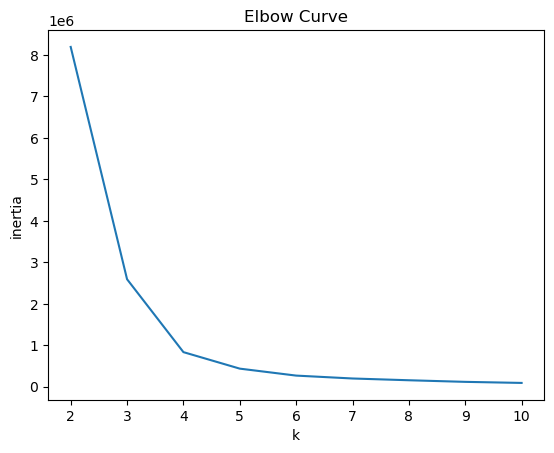

In [33]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(df_elbow["k"], df_elbow["inertia"])
plt.title("Elbow Curve")
plt.xticks(df_elbow["k"])
plt.ylabel("inertia")
plt.xlabel("k")
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No it does not

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [34]:
# Initialize the K-Means model using the best value for k
# Fit the K-Means model using the scaled data
new_df3 = df_pca.copy()


# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=5, random_state=1)

# Fit the model
model.fit(X)

# Make predictions
preds = model.predict(X)

# Add a class column with the labels to the df DataFrame
new_df3 = new_df3.copy()
new_df3['clusters'] = preds

df_sub2.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,0
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,0
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,4
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,4
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,0


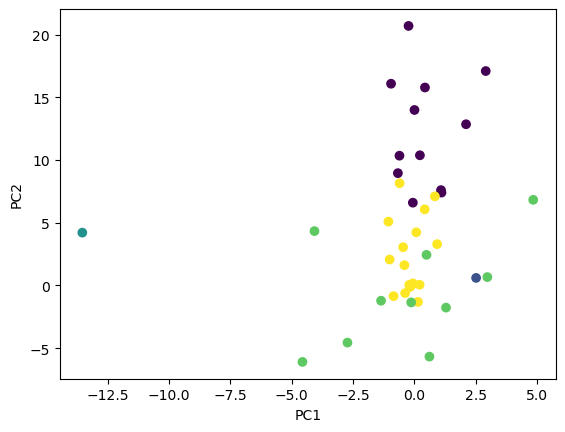

In [35]:
# Predict the clusters to group the cryptocurrencies using the scaled data
plt.scatter(df_sub2.price_change_percentage_24h, df_sub2.price_change_percentage_7d, c=df_sub2.clusters)
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.show()

# Print the resulting array of cluster values.


In [36]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
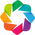

ValueError: Unexpected option 'padding' for Layout type across all extensions. No similar options found.

In [46]:
import pandas as pd
import numpy as np
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import holoviews as hv
hv.extension('bokeh')

# Assuming df_sub2 is your DataFrame with cryptocurrency data
# If not, you need to load your data here

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_sub2[['price_change_percentage_24h', 'price_change_percentage_7d']])

# Perform PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
df_sub2['PC1'] = pca_result[:, 0]
df_sub2['PC2'] = pca_result[:, 1]

# Calculate Elbow Curve
inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertias.append(kmeans.inertia_)

df_elbow = pd.DataFrame({'k': k_range, 'inertia': inertias})

# Perform K-means clustering with optimal k (let's say 4 for this example)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_sub2['clusters'] = kmeans.fit_predict(scaled_features)

# Create interactive Elbow Curve
elbow_plot = df_elbow.hvplot.line(
    x='k', y='inertia', title='Elbow Curve', xlabel='Number of Clusters (k)', 
    ylabel='Inertia', width=700, height=400, line_width=2
).opts(tools=['hover'])

# Create interactive Cluster Scatter Plot
scatter_plot = df_sub2.hvplot.scatter(
    x='PC1', y='PC2', by='clusters', hover_cols=['price_change_percentage_24h', 'price_change_percentage_7d'],
    title='Cryptocurrency Clusters', xlabel='Principal Component 1', ylabel='Principal Component 2',
    width=700, height=400, size=50, legend='top_right', cmap='Category10'
).opts(tools=['hover'])

# Combine plots
combined_plot = (elbow_plot + scatter_plot).cols(1)

# Set global options for better appearance
combined_plot = combined_plot.opts(
    title="Cryptocurrency Clustering Analysis",
    fontsize={'title': 16, 'labels': 12, 'xticks': 10, 'yticks': 10},
    padding=0.1,
    toolbar='above'
)

# Display the combined interactive plot
combined_plot

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [37]:
# Composite plot to contrast the Elbow curves

In [38]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 